In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.preprocessing import FunctionTransformer

In [2]:
# Import data
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv')
y_test = pd.read_csv('data/y_test.csv')

In [3]:
# Create Function Transformer to use Feature Union
def get_numeric_data(x):
    return x.drop(['review','review_processed','review_processed_stop'],axis=1)

def get_text_data(x):
    return x['review_processed']

transformer_numeric = FunctionTransformer(get_numeric_data)
transformer_text = FunctionTransformer(get_text_data)

In [4]:
# Function to return metrics for test
def model_metrics(y_pred, y_pred_proba):
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1:', f1_score(y_test, y_pred, average='macro'))
    print('ROC_AUC:', roc_auc_score(y_test, y_pred_proba))

    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

In [5]:
# Function to return metrics for train
def model_metrics_train(y_pred, y_pred_proba):
    print('Accuracy:', accuracy_score(y_train, y_pred))
    print('Precision:', precision_score(y_train, y_pred))
    print('Recall:', recall_score(y_train, y_pred))
    print('F1:', f1_score(y_train, y_pred, average='macro'))
    print('ROC_AUC:', roc_auc_score(y_train, y_pred_proba))

    print('\nConfusion Matrix:')
    print(confusion_matrix(y_train, y_pred))

    print('\nClassification Report:')
    print(classification_report(y_train, y_pred))

In [6]:
# Function to return a feature importance graph
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df = fi_df.sort_values(by=['feature_importance'], ascending=False).head(40)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

# Logistic Regression

In [7]:
# Load file
logreg = joblib.load('models/logreg.pkl')

In [8]:
# Model prediction
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_proba = logreg.predict_proba(X_test)[:, 1]

y_pred_logreg_train = logreg.predict(X_train)
y_pred_logreg_proba_train = logreg.predict_proba(X_train)[:, 1]

In [9]:
# Evaluation on test
model_metrics(y_pred_logreg, y_pred_logreg_proba)

Accuracy: 0.8574836016696482
Precision: 0.8793486306439674
Recall: 0.939873417721519
F1: 0.7925970964845781
ROC_AUC: 0.9077566126214486

Confusion Matrix:
[[ 250  163]
 [  76 1188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.61      0.68       413
           1       0.88      0.94      0.91      1264

    accuracy                           0.86      1677
   macro avg       0.82      0.77      0.79      1677
weighted avg       0.85      0.86      0.85      1677



In [10]:
# Evaluation on train
model_metrics_train(y_pred_logreg_train, y_pred_logreg_proba_train)

Accuracy: 0.8944124080334063
Precision: 0.9067460317460317
Recall: 0.9593282602991341
F1: 0.8462835977733448
ROC_AUC: 0.9416032321958

Confusion Matrix:
[[ 842  376]
 [ 155 3656]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.69      0.76      1218
           1       0.91      0.96      0.93      3811

    accuracy                           0.89      5029
   macro avg       0.88      0.83      0.85      5029
weighted avg       0.89      0.89      0.89      5029



In [14]:
# Retrieve feature importance score for all features from Random Forest Classifier
logreg_feature_importance = logreg.best_estimator_[1].estimator_.feature_importances_

# Extract column names of all features
logreg_column_names = list(get_numeric_data(X_train).columns) + logreg.best_estimator_['features'].transformer_list[1][1][1].get_feature_names() 

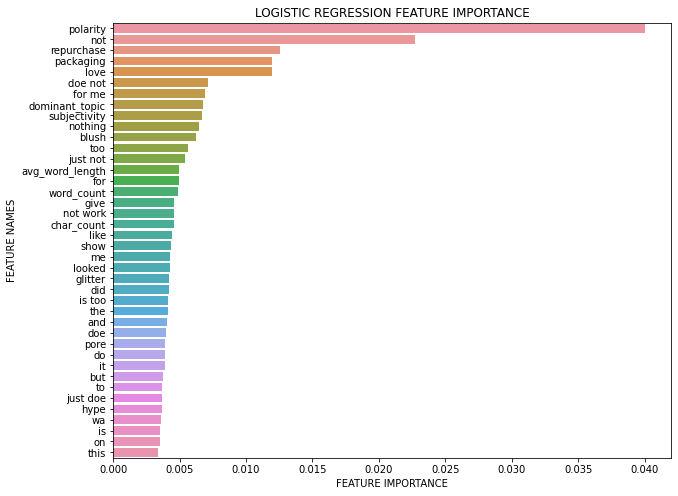

In [15]:
# Plot feature importance graph
plot_feature_importance(logreg_feature_importance, logreg_column_names, "LOGISTIC REGRESSION ")

# SVM

In [16]:
# Load file
svm = joblib.load('models/svm.pkl')

In [17]:
# Model prediction
y_pred_svm = svm.predict(X_test)
y_pred_svm_proba = svm.predict_proba(X_test)[:, 1]

y_pred_svm_train = svm.predict(X_train)
y_pred_svm_proba_train = svm.predict_proba(X_train)[:, 1]

In [18]:
# Evaluation on test
model_metrics(y_pred_svm, y_pred_svm_proba)

Accuracy: 0.8491353607632678
Precision: 0.8681718863801894
Recall: 0.9430379746835443
F1: 0.7755992529865465
ROC_AUC: 0.8810954117755234

Confusion Matrix:
[[ 232  181]
 [  72 1192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.56      0.65       413
           1       0.87      0.94      0.90      1264

    accuracy                           0.85      1677
   macro avg       0.82      0.75      0.78      1677
weighted avg       0.84      0.85      0.84      1677



In [19]:
# Evaluation on train
model_metrics_train(y_pred_svm_train, y_pred_svm_proba_train)

Accuracy: 0.9998011533107973
Precision: 1.0
Recall: 0.9997376016793492
F1: 0.9997292215207563
ROC_AUC: 1.0

Confusion Matrix:
[[1218    0]
 [   1 3810]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       1.00      1.00      1.00      3811

    accuracy                           1.00      5029
   macro avg       1.00      1.00      1.00      5029
weighted avg       1.00      1.00      1.00      5029



In [23]:
# Retrieve feature importance score for all features from Random Forest Classifier
svm_feature_importance = svm.best_estimator_[1].estimator_.feature_importances_

# Extract column names of all features
svm_column_names = list(get_numeric_data(X_train).columns) + svm.best_estimator_['features'].transformer_list[1][1][1].get_feature_names() 

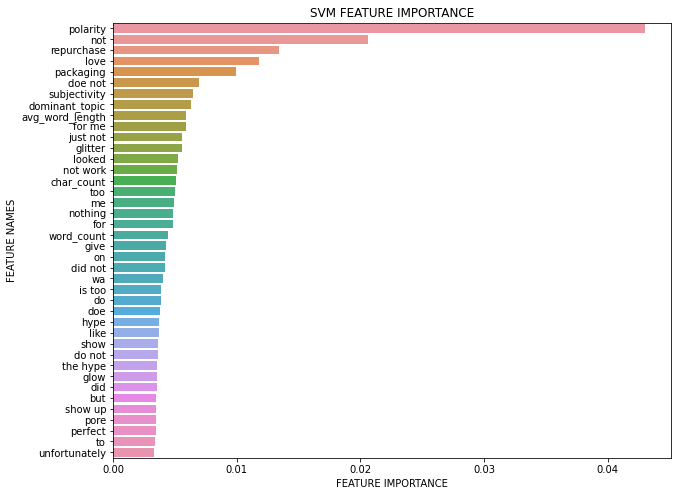

In [24]:
# Plot feature importance graph
plot_feature_importance(svm_feature_importance, svm_column_names, "SVM ")

# Naive Bayes

In [25]:
# Load file
nb = joblib.load('models/nb.pkl')

In [26]:
# Model prediction
y_pred_nb = nb.predict(X_test)
y_pred_nb_proba = nb.predict_proba(X_test)[:, 1]

y_pred_nb_train = nb.predict(X_train)
y_pred_nb_proba_train = nb.predict_proba(X_train)[:, 1]

In [27]:
# Evaluation on test
model_metrics(y_pred_nb, y_pred_nb_proba)

Accuracy: 0.8097793679189028
Precision: 0.8034682080924855
Recall: 0.9897151898734177
F1: 0.6442102350835631
ROC_AUC: 0.8873900450547094

Confusion Matrix:
[[ 107  306]
 [  13 1251]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.26      0.40       413
           1       0.80      0.99      0.89      1264

    accuracy                           0.81      1677
   macro avg       0.85      0.62      0.64      1677
weighted avg       0.83      0.81      0.77      1677



In [28]:
# Evaluation on train
model_metrics_train(y_pred_nb_train, y_pred_nb_proba_train)

Accuracy: 0.824617220123285
Precision: 0.8184387910415307
Recall: 0.9876672789294149
F1: 0.6799653383050691
ROC_AUC: 0.889402985653404

Confusion Matrix:
[[ 383  835]
 [  47 3764]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.31      0.46      1218
           1       0.82      0.99      0.90      3811

    accuracy                           0.82      5029
   macro avg       0.85      0.65      0.68      5029
weighted avg       0.84      0.82      0.79      5029



In [32]:
# Retrieve feature importance score for all features from Random Forest Classifier
nb_feature_importance = nb.best_estimator_[1].estimator_.feature_importances_

# Extract column names of all features
nb_column_names = list(get_numeric_data(X_train).columns) + nb.best_estimator_['features'].transformer_list[1][1][1].get_feature_names() 

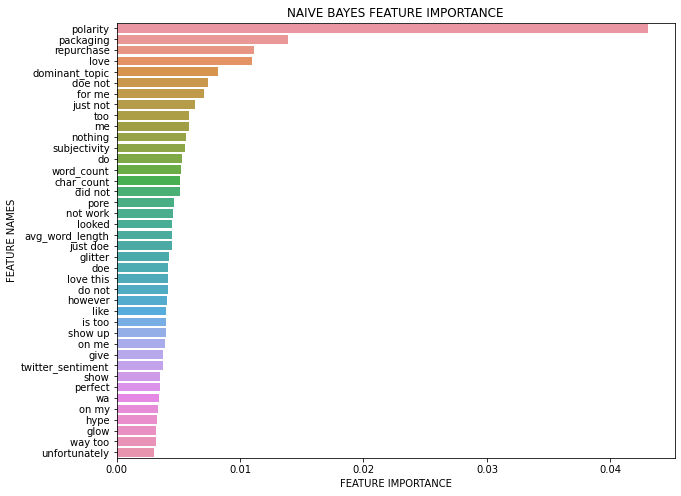

In [33]:
# Plot feature importance graph
plot_feature_importance(nb_feature_importance, nb_column_names, "NAIVE BAYES ")

# Stacking

In [34]:
# Predictions for train datasets and convert to dataframe
y_pred_logreg_train = pd.DataFrame(logreg.predict(X_train))
y_pred_svm_train = pd.DataFrame(svm.predict(X_train))
y_pred_nb_train = pd.DataFrame(nb.predict(X_train))

# Convert test datasets into dataframe
y_pred_logreg = pd.DataFrame(y_pred_logreg)
y_pred_svm = pd.DataFrame(y_pred_svm)
y_pred_nb = pd.DataFrame(y_pred_nb)

In [35]:
# Concatenate the predictions for both train and test datasets for all 3 models
df_train = pd.concat([y_pred_logreg_train, y_pred_svm_train, y_pred_nb_train],axis=1)
df_test = pd.concat([y_pred_logreg, y_pred_svm, y_pred_nb], axis=1)

In [36]:
# Load file
stack_model = joblib.load('models/stack_model.pkl')

In [37]:
# Model prediction
y_pred_stack = stack_model.predict(df_test)
y_pred_stack_proba = stack_model.predict_proba(df_test)[:, 1]

In [38]:
# Evaluation
model_metrics(y_pred_stack, y_pred_stack_proba)

Accuracy: 0.8491353607632678
Precision: 0.8681718863801894
Recall: 0.9430379746835443
F1: 0.7755992529865465
ROC_AUC: 0.7523906580439513

Confusion Matrix:
[[ 232  181]
 [  72 1192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.56      0.65       413
           1       0.87      0.94      0.90      1264

    accuracy                           0.85      1677
   macro avg       0.82      0.75      0.78      1677
weighted avg       0.84      0.85      0.84      1677



# Bagging (Logistic Regression)

In [44]:
# Load file
logreg_bagging = joblib.load('models/logreg_bagging.pkl')
X_test_combined = pd.read_csv('data/X_test_vectorized_logreg.csv')
X_train_combined = pd.read_csv('data/X_train_vectorized_logreg.csv')

In [45]:
# Model prediction
y_pred_logreg_bagging = logreg_bagging.predict(X_test_combined)
y_pred_logreg_bagging_proba = logreg_bagging.predict_proba(X_test_combined)[:, 1]

In [46]:
# Evaluation
model_metrics(y_pred_logreg_bagging, y_pred_logreg_bagging_proba)

Accuracy: 0.8634466308884914
Precision: 0.8813559322033898
Recall: 0.9462025316455697
F1: 0.8001070168379751
ROC_AUC: 0.9194551291874828

Confusion Matrix:
[[ 252  161]
 [  68 1196]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69       413
           1       0.88      0.95      0.91      1264

    accuracy                           0.86      1677
   macro avg       0.83      0.78      0.80      1677
weighted avg       0.86      0.86      0.86      1677



In [47]:
# Out of bag score
logreg_bagging.best_estimator_.oob_score_

0.8162656591767747

# Bagging (Naive Bayes)

In [50]:
# Load file
nb_bagging = joblib.load('models/nb_bagging.pkl')
X_test_combined = pd.read_csv('data/X_test_vectorized_nb.csv')
X_train_combined = pd.read_csv('data/X_train_vectorized_nb.csv')

In [51]:
# Model prediction
y_pred_nb_bagging = nb_bagging.predict(X_test_combined)
y_pred_nb_bagging_proba = nb_bagging.predict_proba(X_test_combined)[:, 1]

In [52]:
# Evaluation
model_metrics(y_pred_nb_bagging, y_pred_nb_bagging_proba)

Accuracy: 0.855098389982111
Precision: 0.8542678695350451
Recall: 0.9738924050632911
F1: 0.767872085306842
ROC_AUC: 0.9149247555705396

Confusion Matrix:
[[ 203  210]
 [  33 1231]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.49      0.63       413
           1       0.85      0.97      0.91      1264

    accuracy                           0.86      1677
   macro avg       0.86      0.73      0.77      1677
weighted avg       0.86      0.86      0.84      1677



In [53]:
# Out of bag score
nb_bagging.best_estimator_.oob_score_

0.8476834360707894